<h1 style="text-align: center;">Deep Learning<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)  # to avoid scientific number display

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU") # check if it's connected to GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset from Keras
# google keras datasets for other datasets for practice
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[9].shape

# 28 x 28'lik resimler var elimizde. tek kanallı ! renkli resim olsaydı (28,28,3) olurdu.

(28, 28)

In [6]:
X_train[9]

# piksel değerlerini görüyoruz : 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

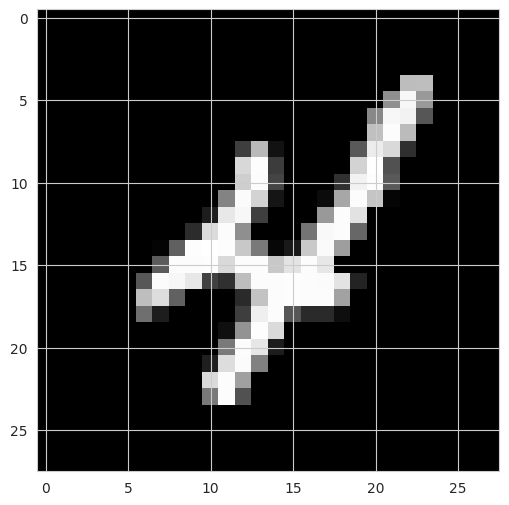

In [7]:
plt.imshow(X_train[9],cmap='gray')

# bize gelen resimler burada  array şeklinde olduğundan bunu plt.imshow ile görselleştirebiliyoruz ama gelen resimler array 
# şeklinde olmasaydı eğer önce arraye çevirip ardından görselleştirebilecektik.
# cmap=None olursa yalancı bir renklendirme (pseudo color) yapar .Ama gray-scale olduğunu bildiğimden bunu belirtiyorum.

<Axes: >

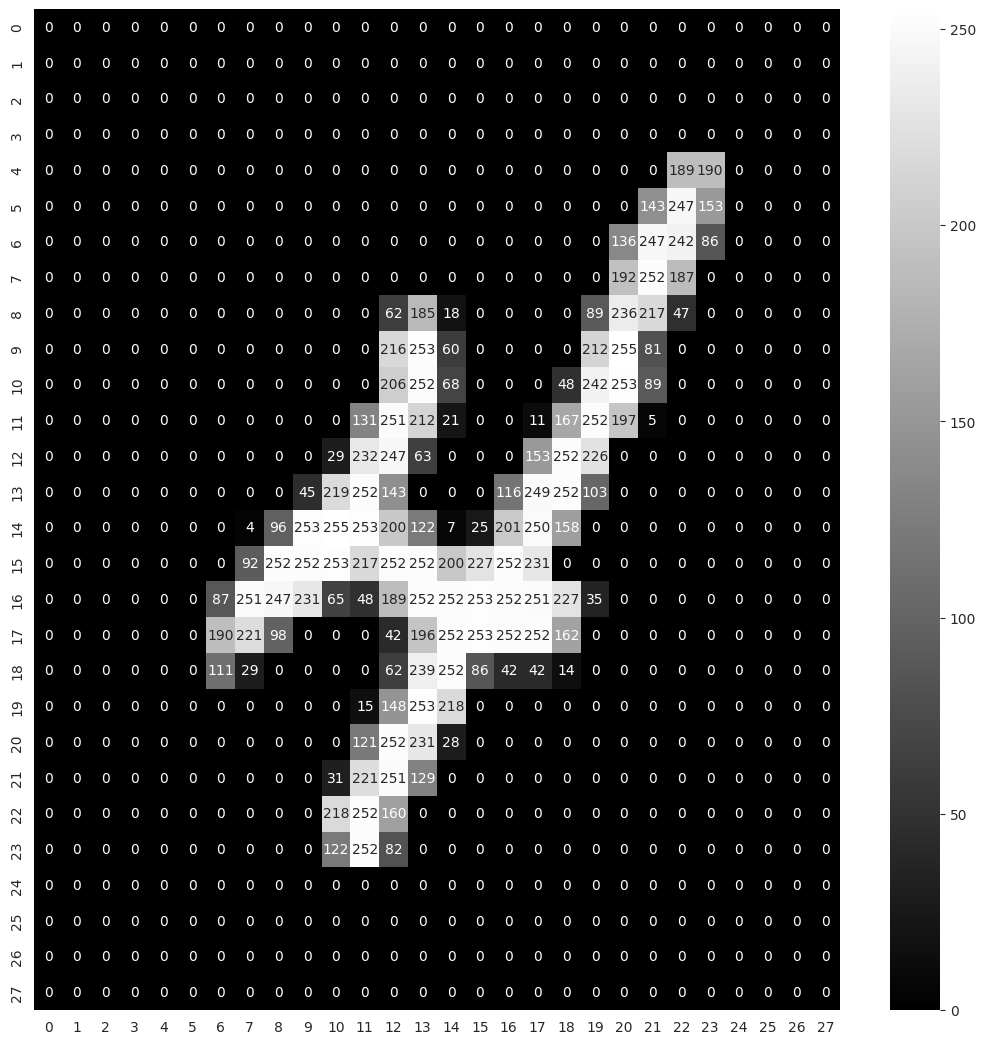

In [8]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[9], annot=True, cmap="gray", fmt=".3g")
# bilgisayar bunu nasıl görüyor ona bakıyoruz.(255'e yaklaştıkça beyaz 0'a yaklaştıkça siyah)

In [9]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [10]:
y_train
# target has 10 different values (from0 to 10). that means we'll use softmax for act function and have 10 neurons in the output layer

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train[9]

4

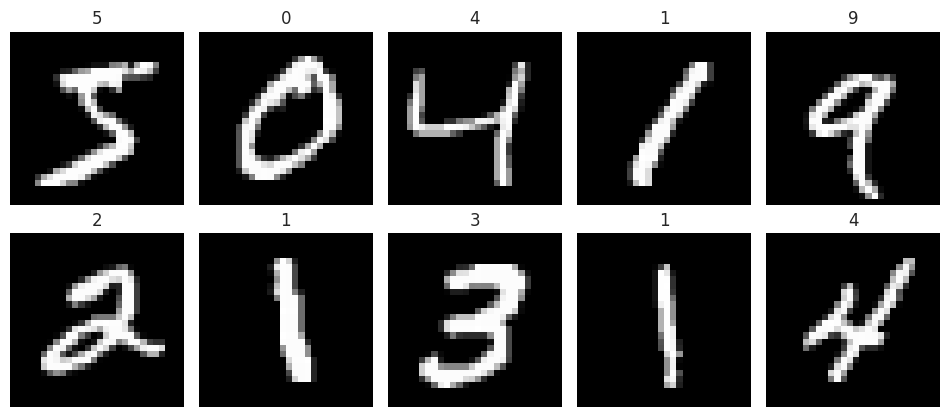

In [12]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.09, 'hspace':0.1}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title( y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

In [13]:
X_train[9].min()
# the darkest value

0

In [14]:
X_train[9].max()
# the whitest value.

255

In [15]:
# Sincw we use G Descent, we have to scale the data. We can normalize it by dividing by 255 to limit it between 0 and 1
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

# MinMaxScaler yapmış oluyoruz aslında burada. we can also use it.
# but we have to check it with min and max, spmetimes the datas could be already scaled.
# minimum değerimiz 0 olduğundan Scaler kullanmadan bu şekilde scaling yapabiliriz. elimizdeki data resimde olsa scaling var!

In [16]:
# che k min and max again
X_train[9].min()

0.0

In [17]:
X_train[9].max()

1.0

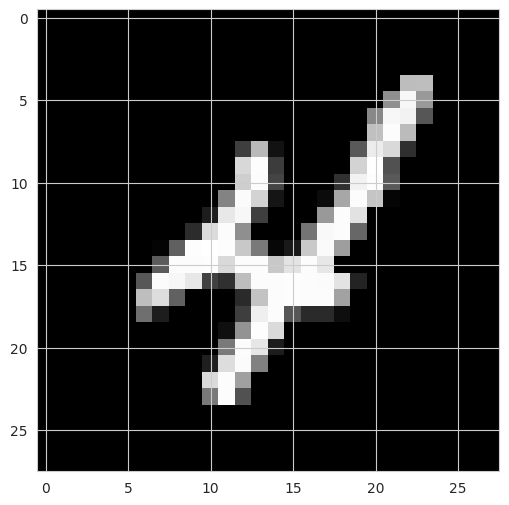

In [18]:
plt.imshow(X_train[9],cmap='gray')

# scale yaptık ama plt.imshow bunu anlıyor ve bize istediğimiz gibi yine resmi getiriyor.

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:

X_train.reshape(60000, 28, 28, 1).shape

# biz modelleme aşamasına geçtiğimizde bizden model kanal sayısını isteyecek ondan dolayı burada kanal sayısını da belirteceğiz.
# model kanal sayısını istiyor çünkü ona göre filtreleri vs ayarlıyor.

# for colored image data: X_train.reshape(60000, 28, 28, 3) 

(60000, 28, 28, 1)

In [21]:
# set the channel number as 1 (for gray images)
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# kanal sayısının ne olduğunu da belirttik.

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
y_train.shape

(60000,)

In [25]:
from tensorflow.keras.utils import to_categorical
# 10 classi da vektorel hale getirmek icin. asagida 29 nolu hucreyi kontrol et. aslinda bir nevi onehotencode yapmis olduk
# onehotencoder sklearn'un; to_categorical ise kerasin encoding metotlarindan birisidir.

In [26]:
# 10 neurons for output. softmax olasiliklarin toplami 1 olacak sekilde dagtiyor. ornegin 4se 4e diyelim 0.65 veriyor
# digerlerine kalan 0.35i dagitiyor ve datayi probabilitysi en yuksek classa atiyor.
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
# (60000, 10) her bir class'ı 10 elemanlı bir vektör şeklinde ifade edebiliyoruz.

In [28]:
y_train[9]

# burada 4'ü temsil eden nöron 1 olsun diğerleri 0 olsun bu hale çevirdik to_categorical ile Y_train'i:

4

In [29]:
Y_train[9]

## kuracağımız mimariye uygun hale getirdik targetımızı.(output layer'a uygun şu anda.)
# fit aşamasında bu Y_train'i kullanacağımıza dikkat edelim.

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
# conv2d 2d kernel stride icin
# flatten fully connected yapiya gecis icin
# bu datada maxpool2d kullanacagiz; AvgPool2D de kullanabiliriz import edip istersek

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # default olarak stride = 1, padding = valid 
# conv layerda filters sayesinde feature learning oluyor
# kernel_size filtreler
                # 32 filtre olsun bunlar 3*3'lük filtreler olsun -------> filter_size = kernel_size
                # input_shape=(28, 28, 1) yine burada belirtebiliyoruz.

                # 28 28; default padding ile 28-3 +1 26,26 olacak. 32 de channnel. yani 26,26,32. bir altta poolingle bunu 13,13,32 yapacagiz

model.add(MaxPool2D(pool_size=(2, 2))) # default olarak stride = pool size, padding = valid

# egitim amacli tek bir conv layer ve tek bşir maxpool layer eklemekle yetindik.

model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz. input layer oluyor burasi
# 13x13x32 = 5408 tane feature'muz olacak ilk input layer icin. 
model.add(Dense(128, activation='relu')) # digerlerini de denedik relu daha iyi calisti
# 64 veya 256 da deneyebiliriz. deneme yanilma ile daha guzel skorlar aldigimiz icin 128 sectik.

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # multiclass oldugu icin binary degil categorical_crossentrppy kullaniyoruz
              optimizer='adam',
              metrics=['accuracy'])

# compile kismindan anladigimiz: loss functiondaki categorical crossentropy minimize edilecek sekilde model wieghts ve bias 
# guncellemesi yapiyor. Accuracy'i ise takip etmek icin kullaniyoruz. Yerine Recall da yazabiliriz. Burada asil model calismasi loss 
# uzerinden olacak. calisirken accuracy veya recalle ozel bir onem verip ona gore calismayacak

In [32]:
model.summary()

## max_pooling2d katmanında eğitilecek bir parametre yoktur burada sadece downsampling oluyor 
## Flatten'da da yine eğitilecek bir parametre yoktur burada sadece ann mimarisine bir hazılık yapıyoruz.

# Summary'de asagidaki none'lar yerine mdoel.fit sonrasi batch size olacak. batchsize belirtmedigimiz icin nonne su an
# 320 neden: ilk con layerda 3x3 filter var e 1 chanelli. Yani her filtrede 3x3x1 p katsayi, bir de bias toplam 10 katsayi. 32
# tane channle oldugu icin 32x10= 320.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [33]:
((3 * 3 * 1) + 1) * 32

320

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=4, restore_best_weights = True)

# cnn'de overfittinge gitme ihtimalimiz çok yüksektir bunun nedeni ; featurelar aslında çok fazla oluyor (feature learning)
# ama onlara karşılılık gelen data sayım o kadar fazla olmuyor genelde. bundan dolayı patience'ı cnn modellerinde düşük seçeriz.

# mode max cunku burda max acc istiyoruz.

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop]) 
# aslinda val data icin val data olusturmamiz lazim. ama zaman kisiti nedeniyle simdilik test ile calisabiliriz.

# softmaxle catgoricale uygun hale getirilmis buyuk Ytraini verdik modele, d,kkat

Epoch 1/20
1875/1875 [==============================] - 21s 4ms/step - loss: 0.1452 - accuracy: 0.9567 - val_loss: 0.0617 - val_accuracy: 0.9792
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0453 - val_accuracy: 0.9838
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.0403 - val_accuracy: 0.9870
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0427 - val_accuracy: 0.9859
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0512 - val_accuracy: 0.9854
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0517 - val_accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0512 - val_accuracy

In [37]:
X_train.shape

(60000, 28, 28, 1)

In [38]:
Y_train.shape

(60000, 10)

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.145,0.957,0.062,0.979
1,0.049,0.985,0.045,0.984
2,0.031,0.991,0.040,0.987
3,0.020,0.994,0.043,0.986
4,0.014,0.996,0.051,0.985


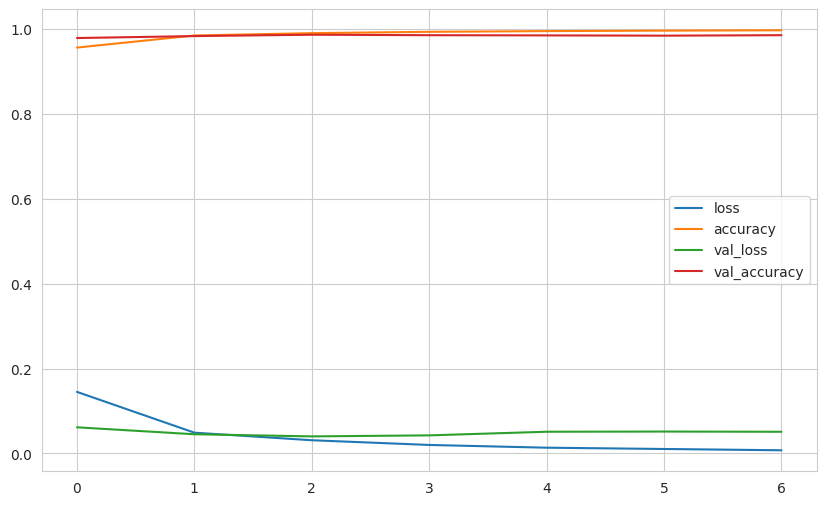

In [41]:
summary.plot();

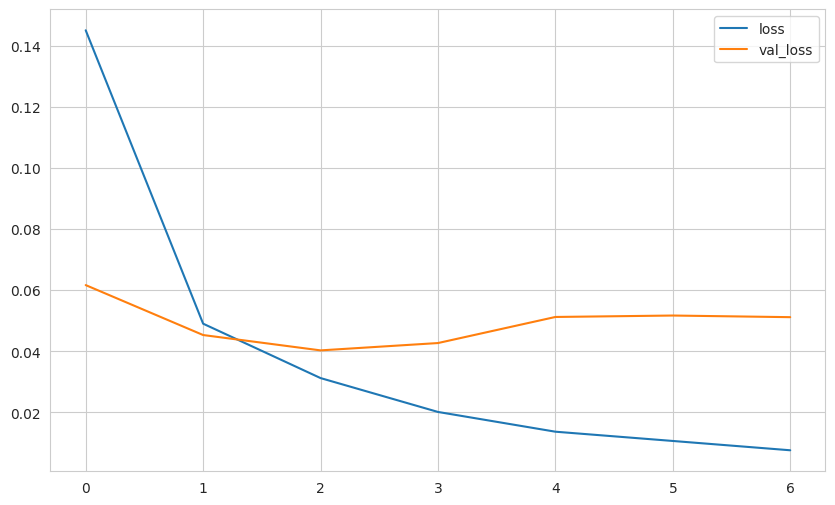

In [42]:
summary[["loss", "val_loss"]].plot();

# grafikleri böyle ayrı ayrı çizdirmekte fayda var ! : tek rafikte fark yeterince belli degil
# egitim arttikca overfitting egilimi artiyor
# early stopla overfittinge gitmeden kestik

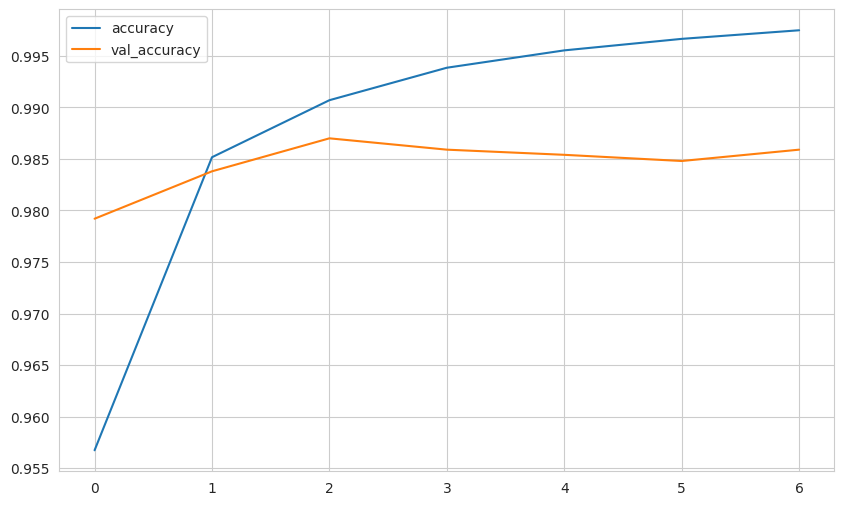

In [43]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [45]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0403 - accuracy: 0.9870


[0.04029655456542969, 0.9869999885559082]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04029655456542969
Test accuracy: 0.9869999885559082


In [47]:
pred_prob = model.predict(X_test)
pred_prob

# her bir resim için 10 boyutlu bir vektör döndürüyor ------> olasılıklar bunlar 
# ornegin ilk fotoda bir tanesine 0.99 vermis, digerlerine de kalan orani dagitmis
# ikinci de 0.99 ile 2 oldugunu bilmis

313/313 [==============================] - 1s 2ms/step


array([[0.00000019, 0.00000001, 0.0000428 , ..., 0.9999443 , 0.00000546,
        0.00000057],
       [0.00000078, 0.00003922, 0.999931  , ..., 0.        , 0.00002814,
        0.00000043],
       [0.00000132, 0.9998623 , 0.00000066, ..., 0.00001873, 0.00001855,
        0.00000021],
       ...,
       [0.        , 0.00000002, 0.        , ..., 0.00000009, 0.00000032,
        0.0000015 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00004029,
        0.00000001],
       [0.00000005, 0.        , 0.        , ..., 0.        , 0.00000001,
        0.        ]], dtype=float32)

In [48]:
pred_prob.shape

(10000, 10)

In [49]:
pred_prob[0]

# ilk data için döndürdüğü olasılıklar : 

array([0.00000019, 0.00000001, 0.0000428 , 0.00000664, 0.        ,
       0.00000001, 0.        , 0.9999443 , 0.00000546, 0.00000057],
      dtype=float32)

In [50]:
np.argmax(pred_prob[0])

# np.argmax ------> bu vektördeki max değerin indexini almak için kullanıyoruz .

7

In [51]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

# pred_probların tamamına argmaxla class'larını alıyoruz ki classifaciton reporta bakalım :

array([7, 2, 1, ..., 4, 5, 6])

In [52]:
y_pred.shape

(10000,)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
print(confusion_matrix(y_test, y_pred))

[[ 977    1    1    1    0    0    0    0    0    0]
 [   0 1133    0    1    0    0    0    0    1    0]
 [   2    1 1017    1    2    0    2    2    4    1]
 [   0    0    1 1002    0    3    0    0    4    0]
 [   0    0    0    0  973    0    1    0    2    6]
 [   1    0    0    9    0  878    4    0    0    0]
 [   6    2    0    1    1    5  941    0    2    0]
 [   0    4    9    2    1    0    0 1004    2    6]
 [   3    0    1    1    0    1    0    1  963    4]
 [   2    3    0    4    9    4    0    2    3  982]]


<Axes: >

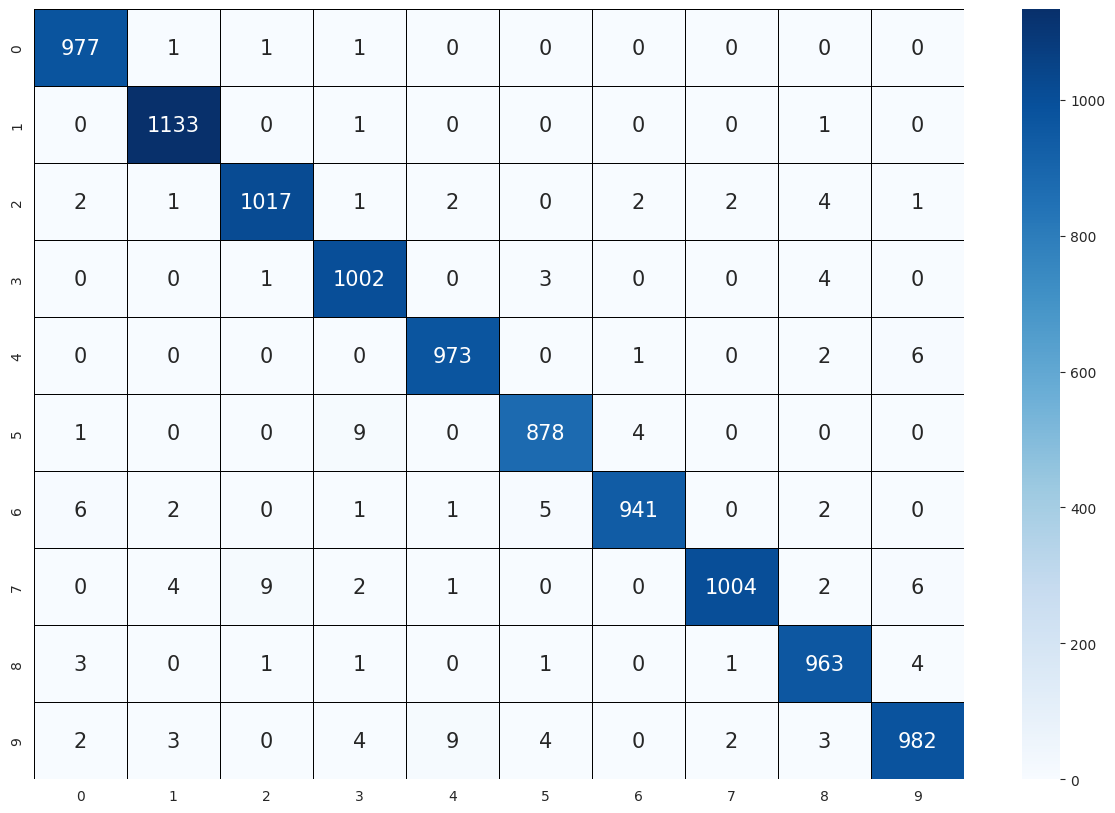

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [56]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

# y_test, y_pred'i karşılaştırıp aynı olmayanları almak için np.not_equal'i kullanıyoruz.

array([False, False, False, ..., False, False, False])

In [57]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

# np.not_equal(y_test, y_pred).sum() ile True'ları toplayıp döndürüyor (toplam hatalı değer)

130

In [58]:
np.equal(y_test, y_pred).sum()

## toplam doğru tahmin sayısı.

9870

# Prediction

In [59]:
my_number = X_test[3]
# yukarida scaling yaptigimiz icin burda gerek yok. ama yapilmamissa scale etmeye dikkat.

In [60]:
my_number.shape

(28, 28, 1)

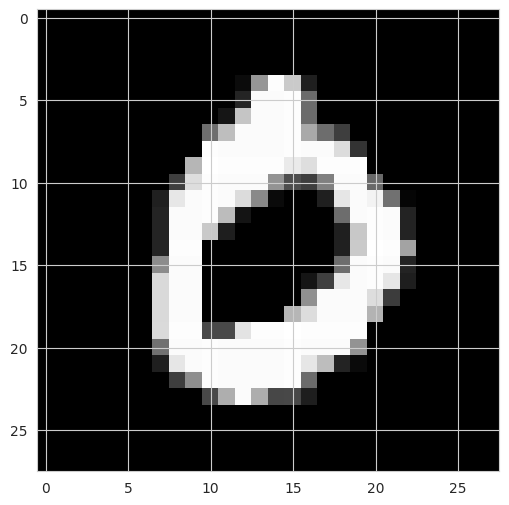

In [61]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [62]:
# prediction alacağımız zaman nasıl eğittiysek modeli o şekilde vereceğiz biz nasıl eğittik batch_size'lar halinde eğittik
# ondan dolayı burada da boyutlu hale getirmeliyiz ; ml'de de mesela df şeklinde eğitim yaptığımızdan prediction alacağımız 
# zaman da ona uygun hale getiriyorduk.

In [63]:
pred_prob = model.predict(my_number.reshape(1,28,28,1)) # tek bir resim olduğunu söylüyoruz.
pred_prob

1/1 [==============================] - 0s 41ms/step


array([[0.9999987 , 0.00000001, 0.00000033, 0.        , 0.        ,
        0.        , 0.00000085, 0.00000005, 0.00000001, 0.00000003]],
      dtype=float32)

In [64]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [65]:
model.save("cnn-1.h5")

# Using

In [66]:
model=tf.keras.models.load_model('cnn-1.h5')

In [67]:
X_test[24].shape

(28, 28, 1)

In [68]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))
# reshape yerine np.expand_dims() de kullanabiliriz, axis 0 olunca ilk başa ekler, axis 3 olunca en sona boyut ekler
# X_test[24].reshape(1,28,28,1)

1/1 [==============================] - 0s 53ms/step


In [69]:
np.argmax(pred)

4

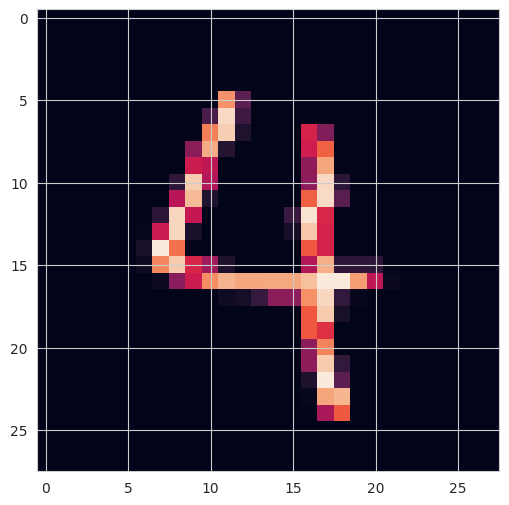

In [70]:
plt.imshow(X_test[24].reshape(28,28))